Use Python <3.11 (defintely works for <3.10, not sure about 3.10)

In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))
from instruments import *
from physical_models import HWP_retardance, IMR_retardance

Start by writing fits info to csv

In [3]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
    csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
    write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

This is specific to what I'm fitting: I'm going to split these csvs into with and without the pickoff

In [4]:
# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_no_pickoff = df.iloc[72:].reset_index(drop=True)
    df_with_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
    csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
    split_csv(csv_path)



Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

Begin with wavelength bin 0, no pickoff

In [3]:
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin10_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-7.69719154e-02  6.88137104e+07 -1.59846113e-02  6.81464109e+07
  5.35328148e-02  6.73968200e+07  1.15401735e-01  6.70759982e+07
  1.52044837e-01  6.70865642e+07]
Interleaved Stds
Length:  144
[1.20191058e-04 8.29540297e+03 1.21121995e-04 8.25508394e+03
 1.21634594e-04 8.20955663e+03 1.21284451e-04 8.18999378e+03
 1.20671125e-04 8.19063882e+03]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

Generating system Mueller matrix

In [4]:
# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


Plotting past fit modeled and observed single differences

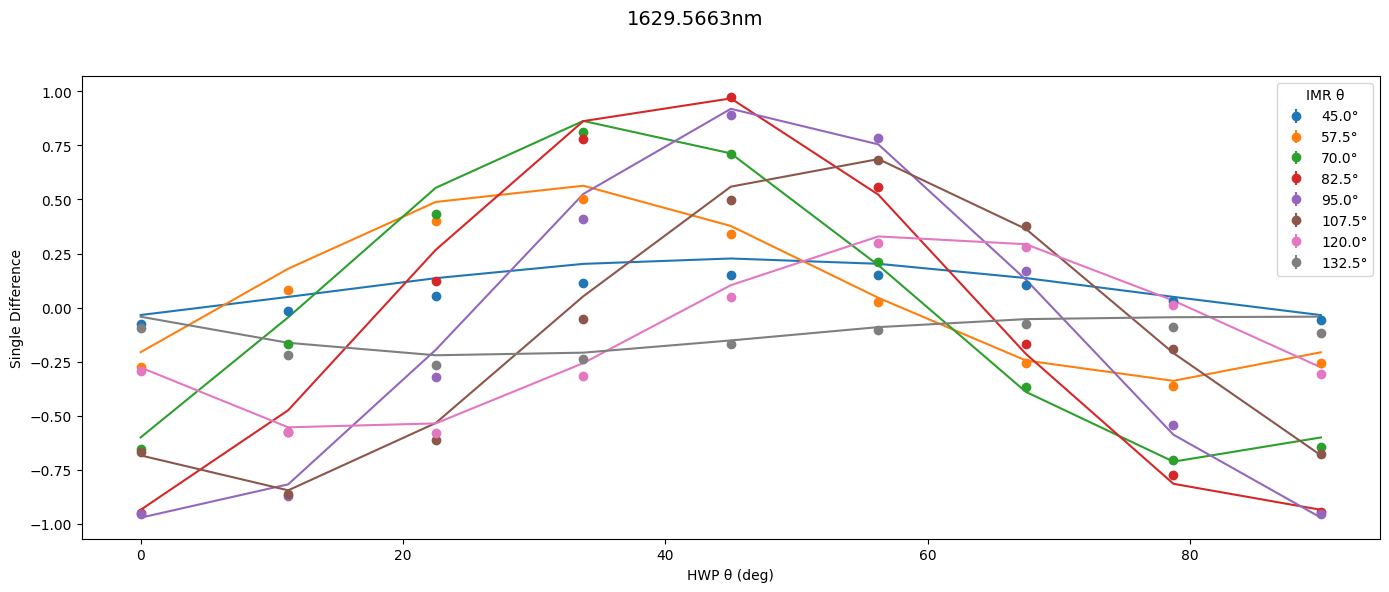

In [5]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[10], IMR_retardance(wavelength_bins)[10]]


# define what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# generate our modeled left and right beam intensities
LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[10], mode='CHARIS')




In [5]:
# find residuals
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())

Residuals range: -0.14479638769905862 0.046412599568080304


Creating dictionary of p0 starting guesses

In [6]:
p0 = {
        "image_rotator" : 
            {"phi": IMR_retardance(wavelength_bins)[10], "delta_theta": offset_imr},
        "hwp" :  
            {"phi": HWP_retardance(wavelength_bins)[10], "delta_theta": offset_hwp},
        "lp" : 
            {"delta_theta": offset_cal }
}
    

p0_values, p0_keywords = parse_configuration(p0)

In [6]:
print(p0_values)

[1.5364262782470774, -0.0118, 2.94675578039066, -0.002, -0.035]


Minimize

In [7]:
# Retardance error bounds plus minus ten percent old fits

hwp_phi_bounds = (0.9*(HWP_retardance(wavelength_bins)[10])), (1.1*(HWP_retardance(wavelength_bins)[10]))
imr_phi_bounds = (0.9*(IMR_retardance(wavelength_bins)[10])), (1.1*(IMR_retardance(wavelength_bins)[10]))

# Offset error bounds plus minus 0.1% old fits

offset_imr_bounds = (1.1*offset_imr, 0.9*offset_imr)
offset_hwp_bounds = (1.1*offset_hwp, 0.9*offset_hwp)
offset_cal_bounds = (1.1*offset_cal, 0.9*offset_cal)


result, logl_result = minimize_system_mueller_matrix(p0, system_mm, interleaved_values, 
    interleaved_stds, configuration_list, bounds = [imr_phi_bounds, offset_imr_bounds,hwp_phi_bounds, offset_hwp_bounds, offset_cal_bounds])
print(result)


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 17302240.63541153
        x: [ 1.690e+00 -1.298e-02  3.241e+00 -1.800e-03 -3.850e-02]
      nit: 1
      jac: [-6.617e+05  1.590e+04 -7.569e+05 -3.409e+04  1.951e+04]
     nfev: 12
     njev: 2
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


In [7]:
print(HWP_retardance(wavelength_bins)[0]*1.1)

3.3020426206053157


Plot new model

Configurations List Length:  72


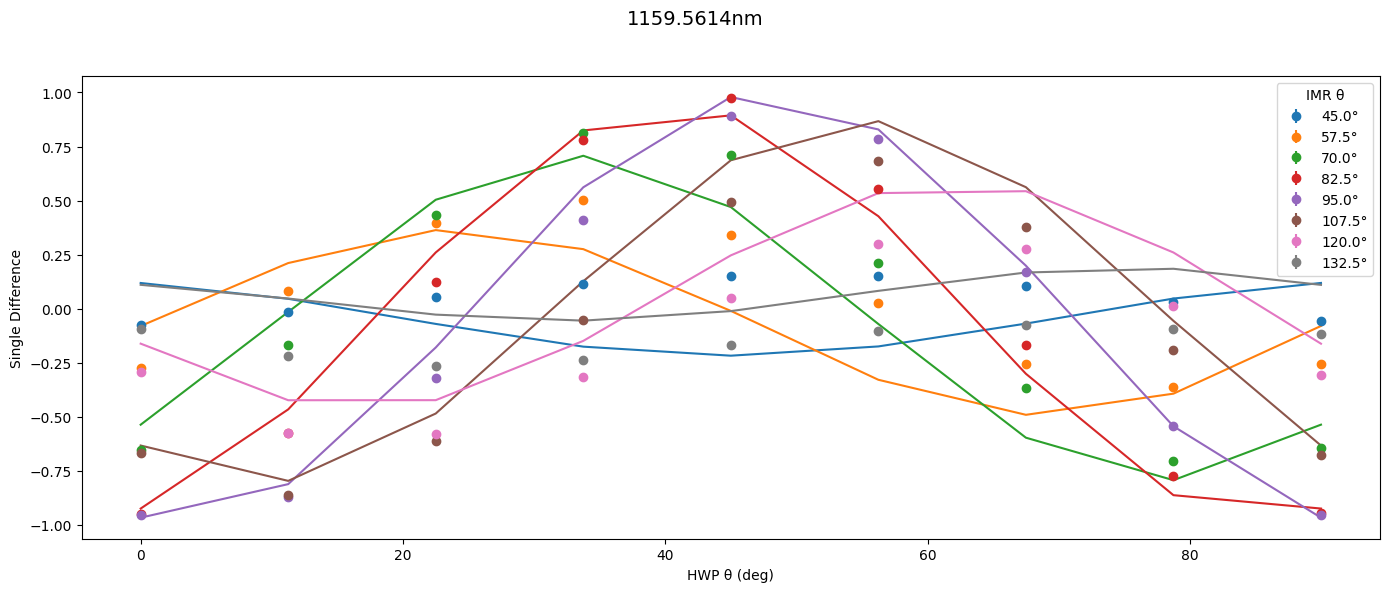

In [8]:


print("Configurations List Length: ", len(configuration_list))

# update p dictionary with the new values

update_p0(p0, result.x)
updated_system_mm = update_system_mm(result.x, p0_keywords, system_mm)
model__ = model(result.x, p0_keywords, system_mm, configuration_list, 
    )
# process model

p0_values, p0_keywords = parse_configuration(p0)


# generate our modeled left and right beam intensities

LR_intensities2 = model(p0_values, p0_keywords, updated_system_mm, configuration_list)

# process these into interleaved single norm differences and sums

diffs_sums2 = process_model(LR_intensities2, 'CHARIS')

# plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums2,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')



In [11]:
print(updated_system_mm.evaluate())

[[ 0.27753925  0.277539   -0.00037299  0.        ]
 [-0.27753925 -0.277539    0.00037299  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [15]:
# find residuals
residuals = interleaved_values[::2] - diffs_sums2[::2]
print("Residuals range:", residuals.min(), residuals.max())

Residuals range: -0.27635081859746824 0.3693618567132713


In [10]:
print("Initial χ²:", logl(p0_values, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list))
print("Final χ²:", logl(result.x, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list))

Initial χ²: 17302240.63541153
Final χ²: 17302240.63541153


Initial χ²: 35277446.101048894

Fit result:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 17302240.63541153
        x: [ 1.690e+00 -1.298e-02  3.241e+00 -1.800e-03 -3.850e-02]
      nit: 1
      jac: [-6.617e+05  1.590e+04 -7.569e+05 -3.409e+04  1.951e+04]
     nfev: 12
     njev: 2
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
Final χ²: 34604481.27082306


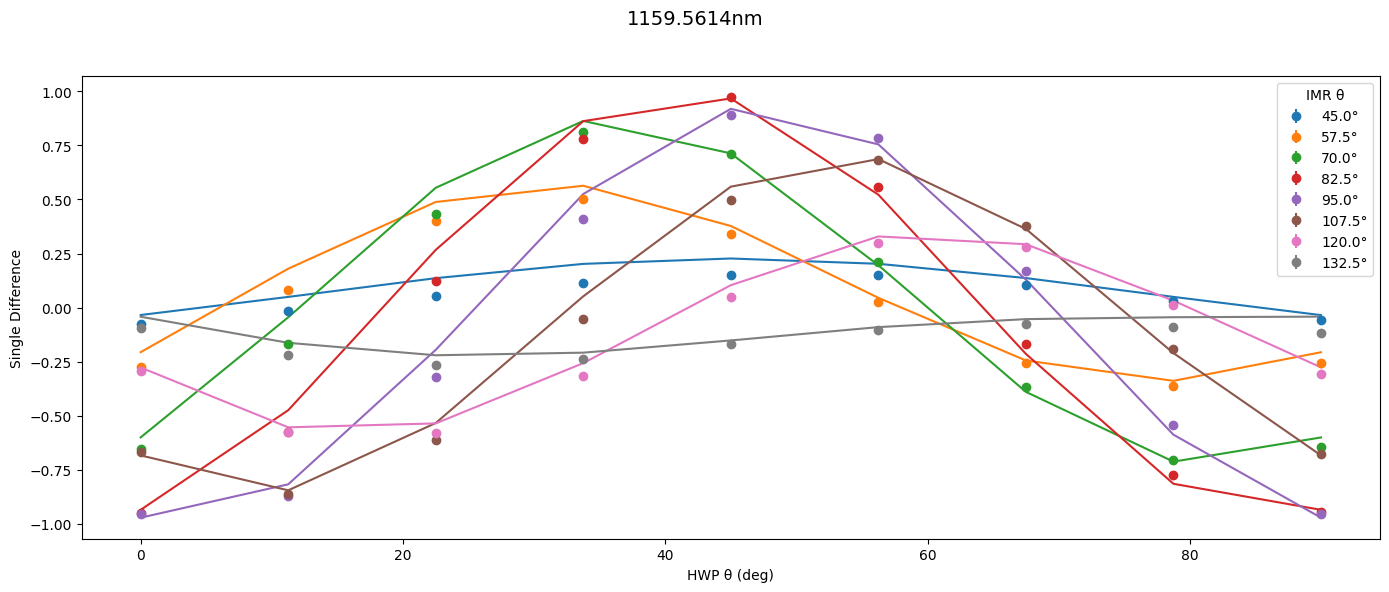

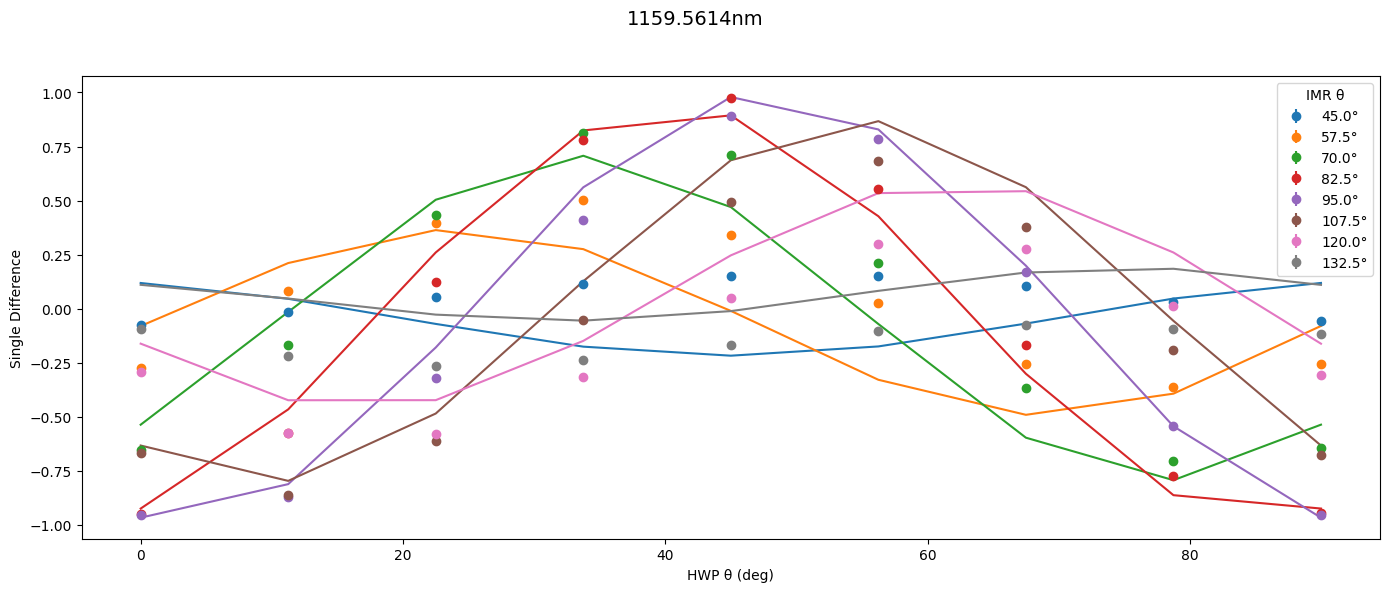

In [11]:
import copy
hwp_phi_bounds = (0.9*(HWP_retardance(wavelength_bins)[10])), (1.1*(HWP_retardance(wavelength_bins)[10]))
imr_phi_bounds = (0.9*(IMR_retardance(wavelength_bins)[10])), (1.1*(IMR_retardance(wavelength_bins)[10]))

# Offset error bounds plus minus 0.1% old fits

offset_imr_bounds = (1.1*offset_imr, 0.9*offset_imr)
offset_hwp_bounds = (1.1*offset_hwp, 0.9*offset_hwp)
offset_cal_bounds = (1.1*offset_cal, 0.9*offset_cal)

# Step 1: Parse p0
p0_values, p0_keywords = parse_configuration(p0)

# Step 2: Deepcopy system_mm to prevent mutation
system_mm_initial = copy.deepcopy(system_mm)

# Step 3: Evaluate model BEFORE fitting
initial_model_output = model(p0_values, p0_keywords, copy.deepcopy(system_mm_initial), configuration_list)
initial_processed = process_model(initial_model_output, 'CHARIS')
initial_logl = logl(p0_values, p0_keywords, copy.deepcopy(system_mm_initial), 
                    interleaved_values, interleaved_stds, configuration_list)
print("Initial χ²:", initial_logl * 2)

# Step 4: Perform the fit using deepcopy(system_mm)
result, logl_result = minimize_system_mueller_matrix(
    p0, copy.deepcopy(system_mm_initial), interleaved_values, interleaved_stds,
    configuration_list, bounds=[imr_phi_bounds, offset_imr_bounds, 
                                 hwp_phi_bounds, offset_hwp_bounds, 
                                 offset_cal_bounds]
)

print("\nFit result:")
print(result)
print("Final χ²:", logl_result * 2)

# Step 5: Evaluate model AFTER fitting
fitted_model_output = model(result.x, p0_keywords, copy.deepcopy(system_mm_initial), configuration_list)
fitted_processed = process_model(fitted_model_output, 'CHARIS')

# Step 6: Compare residuals visually
plot_data_and_model(interleaved_values, interleaved_stds, initial_processed, 
                    configuration_list, wavelength=wavelength_bins[0], mode='CHARIS')

plot_data_and_model(interleaved_values, interleaved_stds, fitted_processed, 
                    configuration_list, wavelength=wavelength_bins[0], mode='CHARIS')
